In this notebook:

- **Cross-Validation:** Stratified cross-validation was performed, not for hyperparameter tuning, but to assess the stability of the selected model. Stratification ensured that the class distribution of the multiclass target variable was preserved across folds, providing reliable and consistent evaluation metrics.

- **Data Usage:** Cross-validation used all available training data, while the test set remained completely unseen to guarantee an unbiased evaluation of the final model.

- **Visualization:** Metrics from each fold were visualized using boxplots to observe variability and standard deviation, confirming the model’s stability across folds.

- **Final Evaluation:** The final model was retrained on the full training set and evaluated on the held-out test set. All metrics were saved for reporting and reproducibility.

In [29]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

### **Importing Libraries**

In [30]:
from src.validation import cross_validate_final_model
from src.utils import load_data
from src.evaluate import evaluate_model
from src.preprocessing import build_preprocessor
from src.encoding import fit_and_save_label_encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing data**

In [31]:
train_data = load_data('../data/03_featured/featured_train_data.csv')

X_train = train_data.drop(columns=['Weather Type'])
y_train = train_data['Weather Type']

test_data = load_data('../data/03_featured/featured_test_data.csv')

X_test = test_data.drop(columns=['Weather Type'])
y_test = test_data['Weather Type']

### **Cross Validation**

In [32]:
# Building just the preprocessor for Logistic Regression (0- Logistic Regression, 1- Tree-Based Models)
preprocessor = build_preprocessor(X_train)[0]

scores = cross_validate_final_model(X_train, y_train, preprocessor)
scores_df = pd.DataFrame(scores)
scores_summary = scores_df.drop(columns=['fold']).describe().loc[['mean', 'std']]
print(scores_df)
print(scores_summary)

   precision    recall        f1   roc_auc  fold
0   0.966045  0.966188  0.965857  0.990541     1
1   0.949439  0.949239  0.949044  0.989608     2
2   0.959101  0.959391  0.959058  0.988377     3
3   0.954008  0.954315  0.954032  0.986840     4
4   0.963048  0.962775  0.962609  0.992835     5
      precision    recall        f1   roc_auc
mean   0.958328  0.958381  0.958120  0.989640
std    0.006710  0.006734  0.006708  0.002261


In [33]:
scores_df.to_csv('../results/03_cross_validation/cv_scores_final_model.csv', index=False)
scores_summary.to_csv('../results/03_cross_validation/cv_scores_summary_final_model.csv')

### **Evaluating model stability**

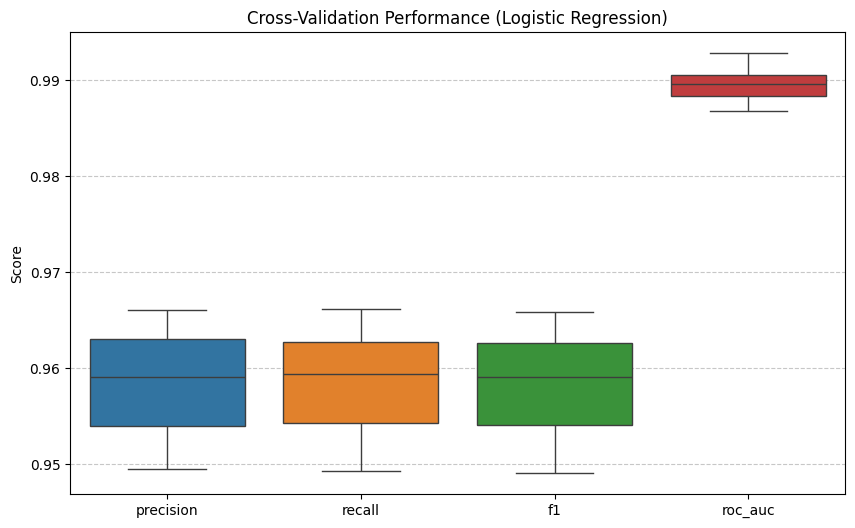

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=scores_df.drop(columns=['fold']),whis=(0, 100))
plt.title("Cross-Validation Performance (Logistic Regression)")
plt.ylabel("Score")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

A **5-fold stratified cross-validation** was performed on the final **Logistic Regression** model. Results show consistent performance across folds with low variance, confirming the robustness and generalization ability of the selected model (**Logistic Regression**).

### **Training and Evaluating Final Model**

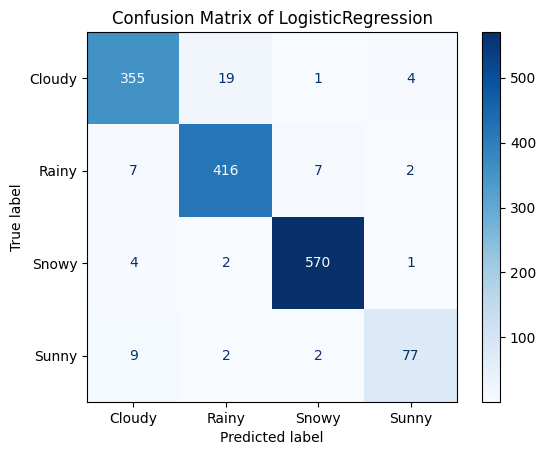

In [35]:
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

le = fit_and_save_label_encoder(y_train)
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

final_model.fit(X_train, y_train_encoded)

final_metrics, cm = evaluate_model(final_model, X_test, y_test_encoded, label_encoder=le)
final_results = pd.DataFrame([final_metrics])
final_results.to_csv('../results/03_cross_validation/final_model_metrics.csv', index=False)

- The **cross-validation** results showed low variance across folds, indicating a stable model. The final evaluation on the test set confirmed that the model generalizes well, with no evidence of **overfitting**. These results validate the final **Logistic Regression** model as robust and reliable for predicting the target variable.